In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [3]:
title = "# Estimators and data exploration"
# Print title and setup TeX defs for both KaTeX and MathJax
import bayesian_stats_course_tools
bayesian_stats_course_tools.misc.display_markdown_and_setup_tex(title)

import matplotlib.style
matplotlib.style.use("bayesian_stats_course_tools.light")

# Estimators and data exploration

<!-- Define LaTeX macros -->
$\def\E{\operatorname{E}}$
$\def\Var{\operatorname{Var}}$
$\def\Cov{\operatorname{Cov}}$
$\def\dd{\mathrm{d}}$
$\def\ee{\mathrm{e}}$
$\def\Norm{\mathcal{N}}$
$\def\Uniform{\mathcal{U}}$

<!-- MathJax needs them to be defined again for the non-inline environment -->
$$\def\E{\operatorname{E}}$$
$$\def\Var{\operatorname{Var}}$$
$$\def\Cov{\operatorname{Cov}}$$
$$\def\dd{\mathrm{d}}$$
$$\def\ee{\mathrm{e}}$$
$$\def\Norm{\mathcal{N}}$$
$$\def\Uniform{\mathcal{U}}$$

## Statistics and estimators

A statistic is a function of a sample of RVs.

An *estimator* is a statistic that estimates a parameter of the population distribution that the samples are drawn from.

An estimator for population parameter $\theta$ is usually written with a hat: $\hat \theta (X_1,\dots,X_n)$, for sample $X_1,\dots,X_n$.

For example:
- Sample mean:
    - $\hat\mu = \bar X = \frac{1}{n}\sum_{i=1}^n X_i$

- Sample variance:
    - $\hat\sigma^2 = s^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i-\bar X)^2$


### Bias

An estimator is unbiased if its expectations agrees with the population parameter:
$$
    \E[\hat\theta] = \theta
$$

For example, the sample mean:

$$
    \E[\bar X] = \E[\frac{1}{n}\sum_i X_i] = \frac{1}{n}\sum_i\int x p_{X_i}(x)\dd x
$$

If the $X_i$ are all from the same distribution $p_{X_i}(x) = p_{X}(x)$ then 

$$
    \E[\bar X] = \frac{1}{n}\sum_i\int x p_{X}(x)\dd x = \int x p_{X}(x)\dd x = \mu
$$
So the sample mean is an unbiased estimator of the population mean.


### Variance

Another property of an estimator is its variance. For the sample mean:

\begin{align*}
    \Var[\bar X] &= \E[\bar X^2] - \E[\bar X]^2 = \frac{1}{n^2}\sum_{ij}\E[X_i X_j] - \mu^2 \\
    &= \frac{1}{n^2}\sum_{i=j}\E[X_i X_j] + \frac{1}{n^2}\sum_{i\neq j}\E[X_i X_j]  - \mu^2 \\
\end{align*}

If the $X_i$ are iid, then $\E[X_i X_j] = \E[X_i]\E[X_j] = \mu^2$ and
\begin{align*}
    \Var[\bar X] &= \frac{1}{n^2}\sum_{i=j}\E[X_i X_j] + \frac{n^2 - n}{n^2}\mu^2  - \mu^2 \\
    &= \frac{1}{n}\left(\E[X_1^2] - \mu^2\right) = \frac{1}{n}\sigma^2
\end{align*}

The variance of the mean therefore decreases as $\frac{1}{n}$ and the standard deviation as $\frac{1}{\sqrt{n}}$.



Note that for dependent $X_1,\dots,X_n$ this is not the case (generally, not just for Gaussian distributed $X_i$):
\begin{equation}
    \begin{split}
        \Var[\bar X] &= \Var[\frac{1}{n}\sum X_i] = \frac{1}{n^2}\sum_{i}\Var[X_i] + \frac{1}{n^2}\sum_{i\neq j}\Cov[X_i, X_j] \\
        & = \frac{1}{n}\Var[X_1] + \frac{2}{n^2}\sum_{i>j}\Cov[X_i, X_j]
    \end{split}
\end{equation}

## Sampling distributions

In a Bayesian analysis, we need to know the likelihood of the data: the conditional probability of the observed data, given the parameters. 

If we compress the data using a statistic, we therefore need to know the distribution of the statistic.

Even if the underlying data are normally distributed and the statistic is a simple function, the resulting distribution can become quite complicated.

We can often appeal to the central limit theorem and assume that our statistic is approximately Gaussian distributed but this assumption should be carefully checked, especially when the averaging happens over low number of data.



Sample mean:
- For $n$ iid $\vec X_i\sim\Norm(\vec\mu,\Sigma)$, the sample mean is also Gaussian distributed: $\hat{\vec\mu}\sim\Norm(\vec\mu, \frac{1}{n}\Sigma)$. 


### Sample variance

$$
    \hat\sigma^2 = s^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i-\bar X)^2
$$

The sample variance is distributed as $\frac{\hat\sigma^2}{\sigma^2}\sim \chi^2_{n-1}$, or written differently $\hat\sigma^2\sim \sigma^2\chi^2_{n-1} = \mathrm{Gamma}(\frac{n-1}{2}, 2\sigma^2)$, where $\mathrm{Gamma}$ is the Gamma distribution.

#### Example: angular power spectra

A scalar field on the sphere can be decomposed into spherical harmonic coefficients $a_{\ell m}$. 

For a Gaussian random field these are Gaussian distributed $\Re(a_{\ell m}), \Im(a_{\ell m}) \sim \Norm(0, \frac{C_\ell}{2})$.

The estimator for the angular power spectrum is
$$
    \hat C_\ell = \frac{1}{2\ell + 1}\sum_{m=-\ell}^\ell a_{\ell m}^* a_{\ell m}
$$

From this follows that 
$$
    \hat C_\ell \sim \mathrm{Gamma}\left( \frac{2\ell+1}{2}, \frac{2C_\ell}{2\ell+1}\right)
$$


### Covariance

The multivariate generalisation of the sample variance is the sample covariance:

$$
\hat\Sigma = \frac{1}{n-1}\sum_i^n (\vec X_i - \bar{\vec X})(\vec X_i - \bar{\vec X})^T
$$

The sample covariance is Wishart distributed. 
$$
    \hat\Sigma \sim \mathcal{W}_p(\frac{1}{\nu}\Sigma, \nu)\ ,
$$
where $p$ is the size of the data vector and the number of degrees of freedom $\nu$ is $\nu = n-1$.

The Wishart distribution is a matrix distribution, that is it assigns probabilities to matrices. 
It is a multivariate generalisation of the Gamma distribution.

#### Example: Bias of the inverse of the sample covariance

We are often in the situation where we estimate the covariance from a sample but what we actually care about is the the inverse to compute likelihoods.

If $\hat \Sigma$ is Wishart distributed, then $\hat \Sigma^{-1}$ is inverse Wishart distributed:
$$
    \hat \Sigma^{-1} \sim \mathcal{W}^{-1}_p(\nu\Sigma^{-1}, \nu)
$$

Note that $\hat \Sigma^{-1}$ is a biased estimator of the precision matrix $\Sigma^{-1}$:
$$
    \E[\hat \Sigma^{-1}] = \frac{\nu}{\nu - p - 1}\Sigma^{-1} = \frac{n - 1}{n - p - 2}\Sigma^{-1}
$$

An unbiased estimate of the inverse of the covariance is therefore $\frac{n - p - 2}{n} \hat \Sigma^{-1}$.



The factor $\frac{n - 1}{n - p - 2}$ is sometimes known as the Hartlap factor in cosmology but it is just a consequence of the inverse Wishart distribution.

A cleaner treatment is to marginalise the likelihood over the distribution of the (unknown) true covariance (see [Selletin et al. 2016](http://adsabs.harvard.edu/abs/2016MNRAS.456L.132S))

## Correlation

If we know little about the data, looking for correlations is often a good start. 
The Pearson correlation coefficient is defined as
$$
    \rho_{X,Y} = \frac{\Cov[X, Y]}{\sigma_X \sigma_Y}\ .
$$
It takes values between -1 and 1, with 0 being no correlation.

An estimator for the correlation is:
$$
    \hat r = \frac{\sum_i(X_i - \bar X)(Y_i - \bar Y)}{\sqrt{\sum_i(X_i - \bar X)^2}\sqrt{\sum_i (Y_i - \bar Y)^2}}
$$

Except for jointly Gaussian distributed RVs, lack of correlation does not mean lack of dependence!

![correlation](../assets/Correlation_examples2.svg.png)

by Denis Boigelot

If there is a non-linear relationship between the RVs, the correlation can also be a very insufficient statistic, as illustrated by Anscombe's quartet: all entries have the same mean, variance, and correlation

<img src="../assets/Anscombes_quartet_3.svg" height=500>

The distribution is slightly complicated, involving hypergeometric functions. But we can implement it:

In [5]:
def pearson_r(x, y, axis=0):
    """Compute the Pearson correlation coefficient."""
    x_ = x - np.mean(x, axis=axis, keepdims=True)
    y_ = y - np.mean(y, axis=axis, keepdims=True)

    r = np.sum(x_*y_, axis=axis) / (np.sqrt(np.sum(x_**2, axis=axis))*np.sqrt(np.sum(y_**2, axis=axis)))
    return r

def pearson_r_pdf(r, n, rho):
    """Compute the PDF of the Pearson correlation coefficient."""
    # https://mathworld.wolfram.com/CorrelationCoefficientBivariateNormalDistribution.html
    hypergeom = scipy.special.hyp2f1(0.5, 0.5, (2*n-1)/2, (rho*r+1)/2)
    Gamma = scipy.special.gamma
    return (
        (n-2)*Gamma(n-1)*(1-rho**2)**((n-1)/2)*(1-r**2)**((n-4)/2) 
        / (np.sqrt(2*np.pi)*Gamma(n-0.5)*(1-rho*r)**(n-3/2))
        * hypergeom
    )

To check if the PDF is implemented correctly, let us simulate a large number of iid bivariate normal RVs and compare the histogram of the estimated Pearson correlation coefficient to the analytic PDF.

In [8]:
# Define the covariance matrix for our RVs
rho = 0.5
cov = np.array(
    [[1, rho],
     [rho, 1]]
)
# We use 20 sample to estimate the correlation coefficient from
n = 20

s = scipy.stats.multivariate_normal(cov=cov).rvs((1000, n))
# s.shape = (1000, n, 2), r.shape = (1000,)
r = pearson_r(x=s[...,0], y=s[..., 1], axis=1)

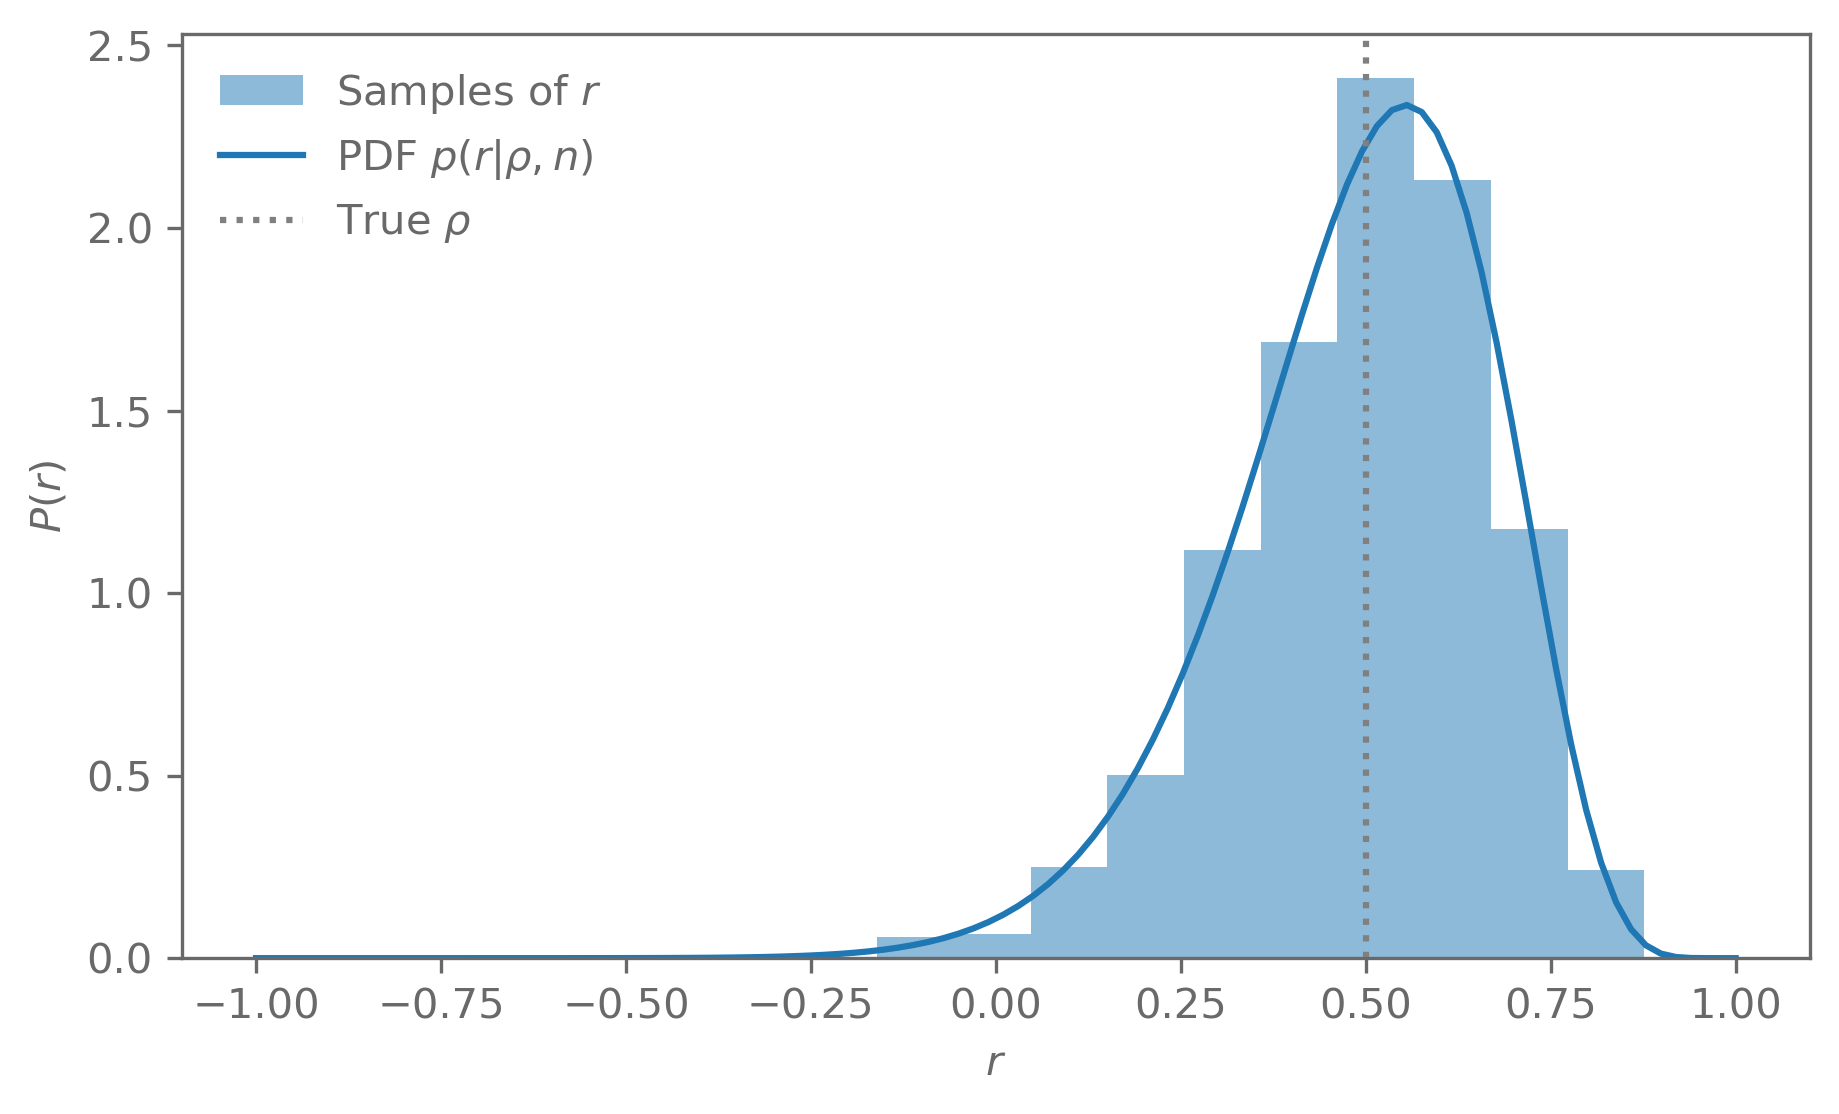

In [9]:

# Make plots
fig, ax = plt.subplots()

x = np.linspace(-1, 1, 100)
ax.hist(r, density=True, alpha=0.5, label=r"Samples of $r$")
ax.plot(x, pearson_r_pdf(r=x, n=n, rho=rho), color="C0", label=r"PDF $p(r|\rho, n)$")
ax.axvline(rho, ls=":", c="grey", label=r"True $\rho$")
ax.set_xlabel("$r$")
ax.set_ylabel("$P(r)$")
ax.legend(frameon=False);

## Malmquist bias

Imagine you measure the luminosities and distances of a sample of galaxies. 
The plot might look something like this:

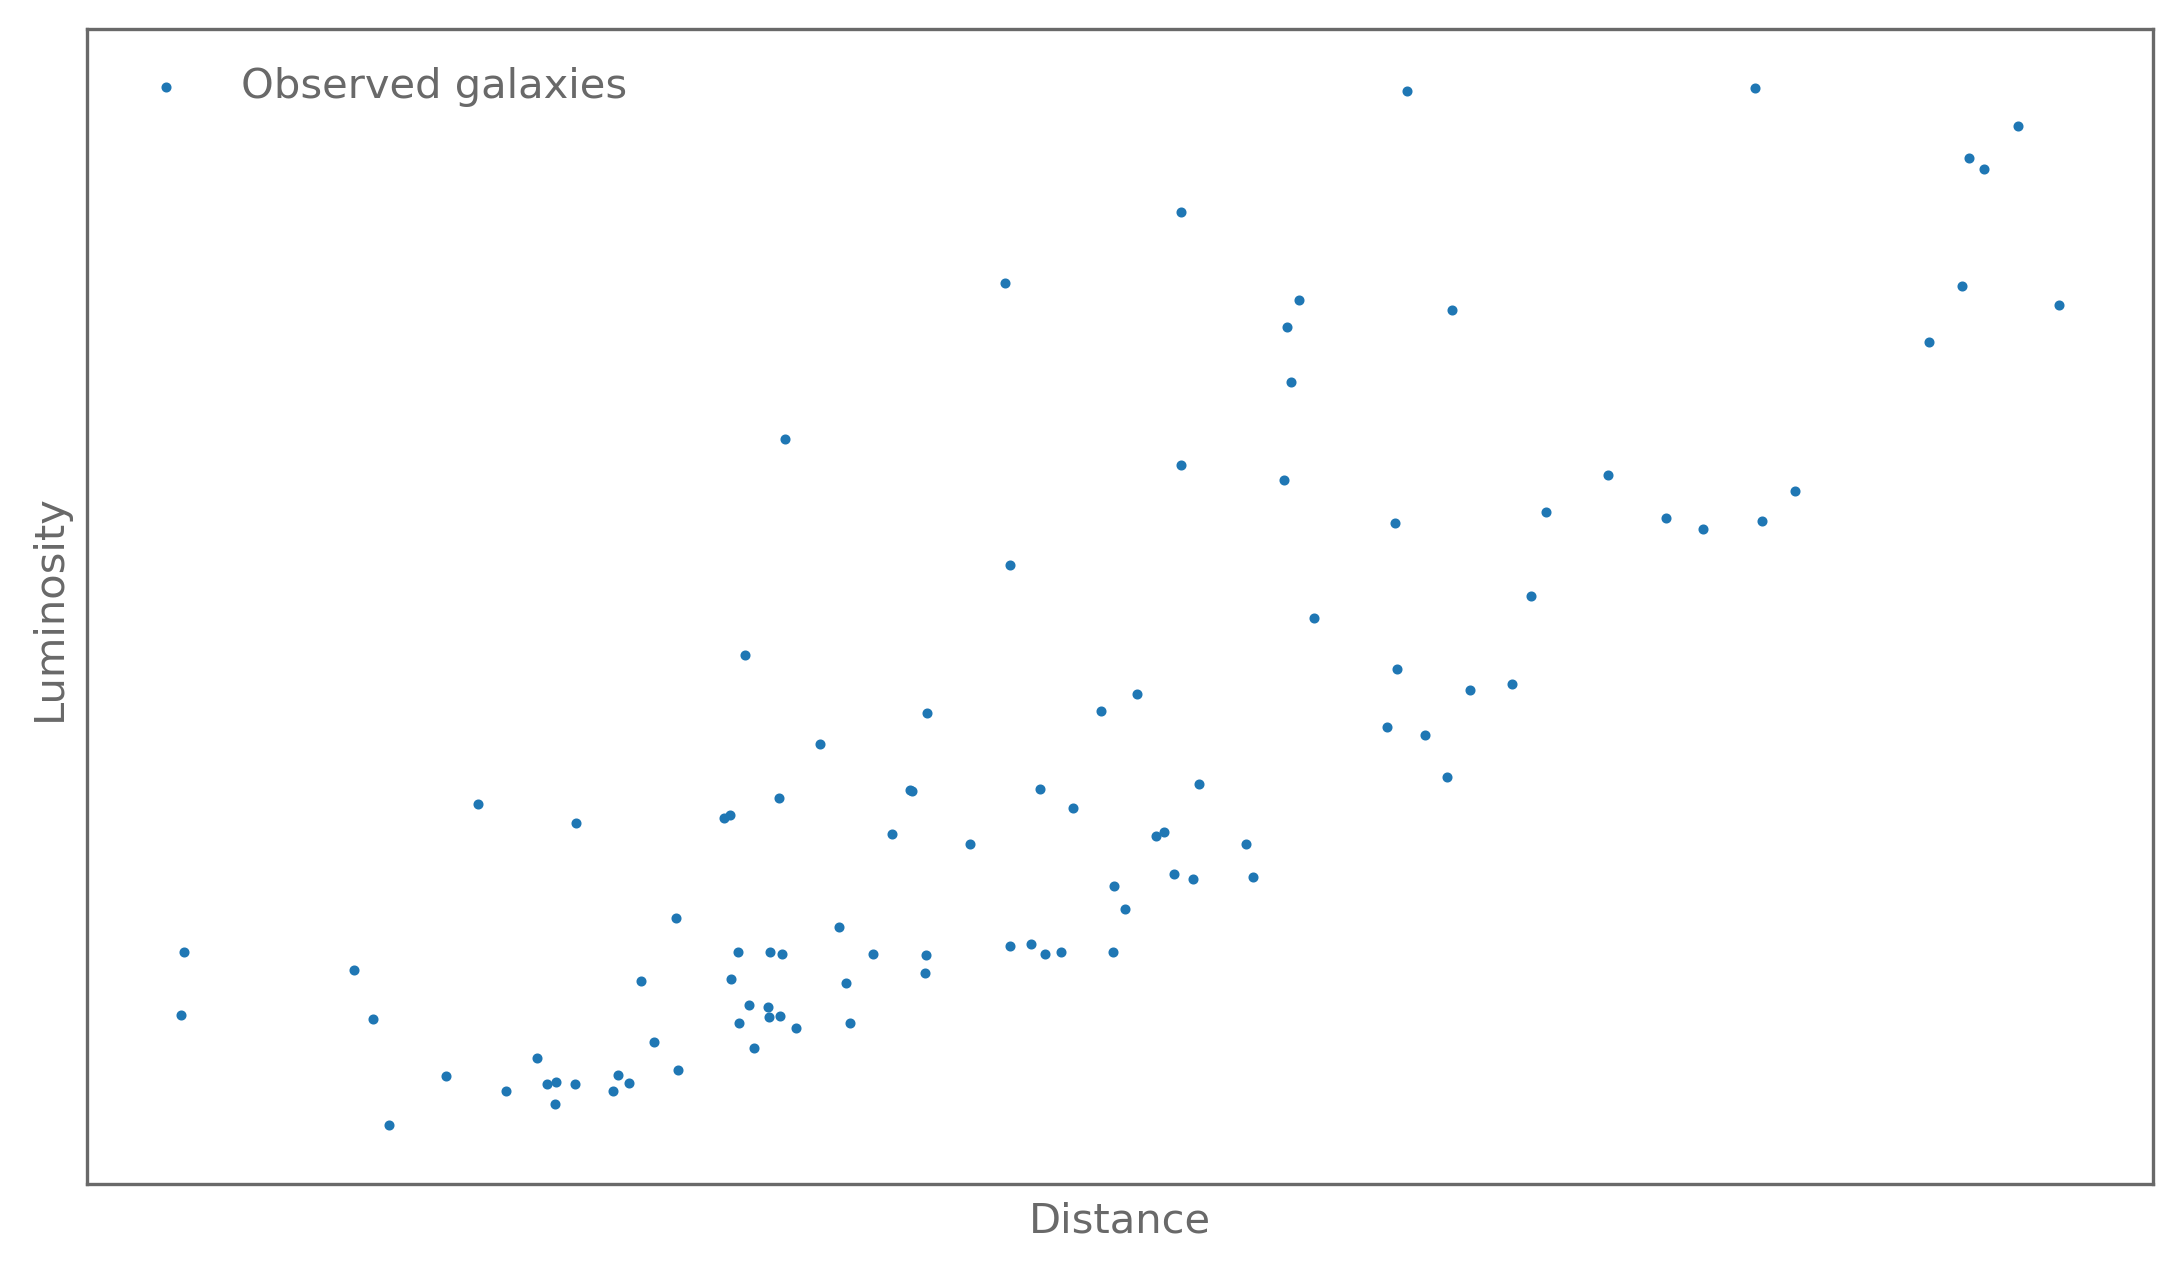

In [ ]:
np.random.seed(42)

def powerlaw_pdf(x, alpha, a, b):
    A = (b**(1-alpha)-a**(1-alpha))
    return np.piecewise(x, [(a<=x) & (x <=b)], [lambda x: (1-alpha)/A * x**(-alpha), 0])

def powerlaw_cdf(x, alpha, a, b):
    A = (b**(1-alpha)-a**(1-alpha))
    return np.piecewise(x, [x < a, (a<=x) & (x <=b)], [0, lambda x: 1/A * (x**(1-alpha) - a**(1-alpha)), 1])

def powerlaw_ppf(x, alpha, a, b):
    A = (b**(1-alpha)-a**(1-alpha))
    return (x*A + a**(1-alpha))**(1/(1-alpha))

def mag_lim(d):
    return 0.2 + 0.2*d**2
luminosity_distr = scipy.stats.pareto(b=1)

distance_bins = np.linspace(0.2, 3.0, 20)
Delta_d = distance_bins[1] = distance_bins[0]

samples = []
observed = []
for d in distance_bins:
    n = 100*d**2

    u = np.random.rand(int(n))

    s = powerlaw_ppf(u, 2.8, 0.1, 4)
    samples.append(
        np.vstack((d + Delta_d*(np.random.rand(s.size)-0.5), s)).T
    )
    observed.append(s > mag_lim(d))

samples = np.concatenate(samples)
observed = np.concatenate(observed)

fig, ax = plt.subplots(figsize=(16/9*5, 5))

ax.scatter(*samples[observed].T, s=2, label="Observed galaxies")

ax.legend(frameon=False)
ax.set_ylim(0.1, 3)
ax.set_xlabel("Distance")
ax.set_ylabel("Luminosity")

ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False);

Is there a correlation of galaxy luminosity with distance?

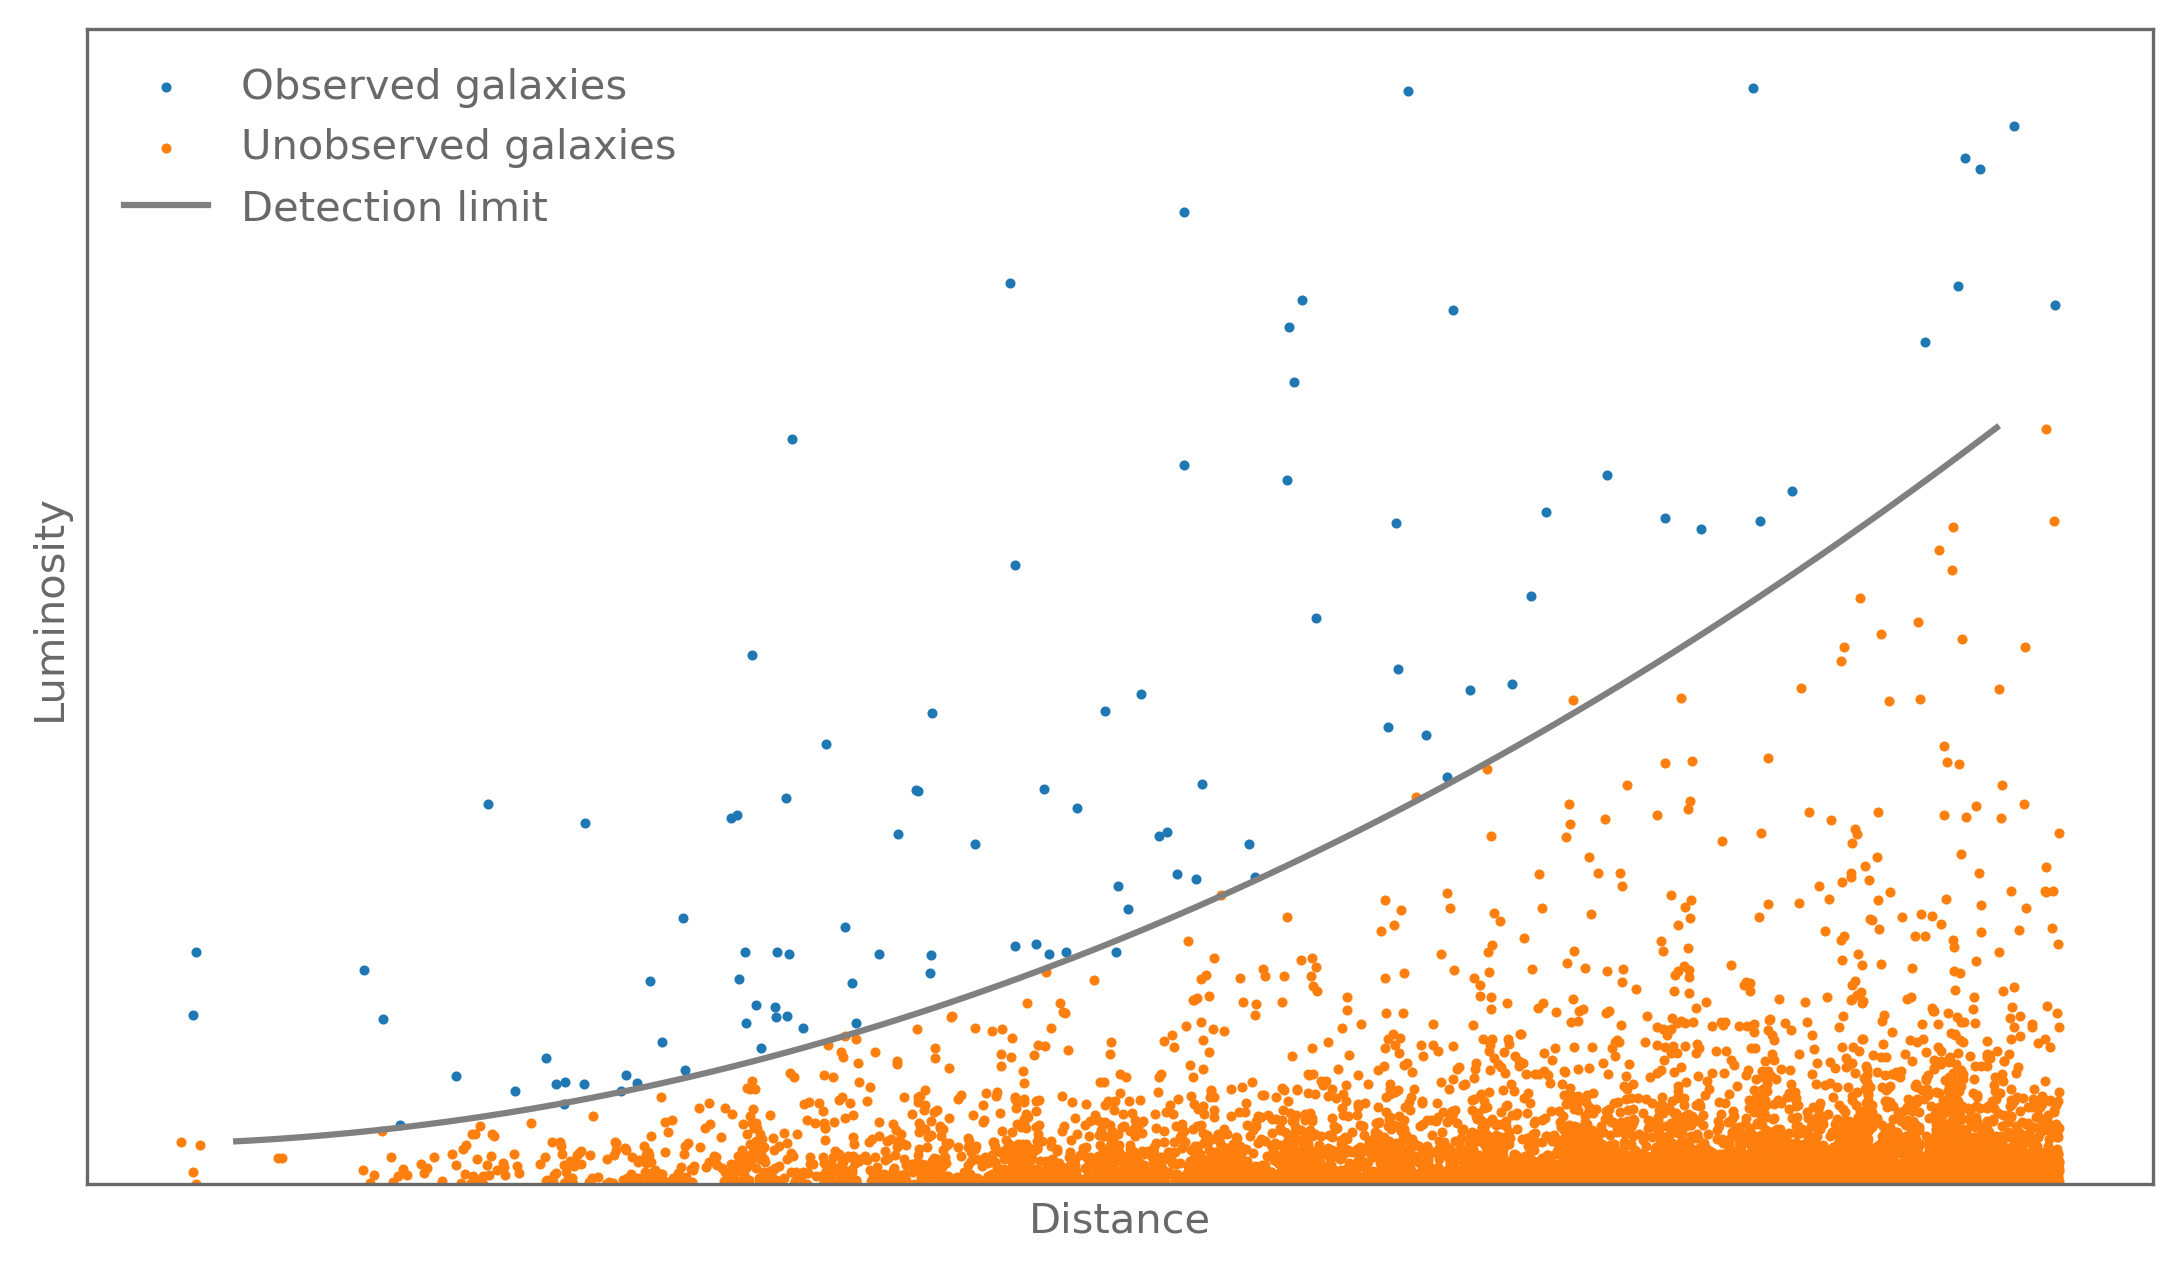

In [ ]:
fig, ax = plt.subplots(figsize=(16/9*5, 5))

d = np.linspace(distance_bins[0], distance_bins[-1], 100)
ax.scatter(*samples[observed].T, s=2, label="Observed galaxies")
ax.scatter(*samples[~observed].T, s=2, label="Unobserved galaxies")
ax.plot(d, mag_lim(d), c="grey", label="Detection limit")

ax.legend(frameon=False)
ax.set_ylim(0.1, 3)
ax.set_xlabel("Distance")
ax.set_ylabel("Luminosity")

ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

fig.dpi = 300;

Be wary of selection effects!

Power-law distributions are common in the physical sciences but they can behave in unintuitive ways. 

## Exercise

Show that the sample variance $s^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i-\bar X)^2$ is an unbiased estimator of the population variance.

Where does the factor of $\frac{1}{n-1}$ come from? What is the unbiased estimator of the population variance if the population mean $\mu$ is known?

Make a toy data set by sampling from a bivariate Gaussian.
Compute the posterior of the correlation coefficient $\rho$, given the observed $\hat r$. 

# Data exploration

## PCA

Principal component analysis is useful when the data has many dimensions and we want to know which of the dimensions are important, in the sense that we can reproduce the salient features of the data with a smaller number of dimensions.

We start with $n$ observations $\vec X_i$, $i=1,\dots,n$ with $p$ features, that we arrange in a $n\times p$ matrix $X_{ij}$.

1. Remove the mean of the observations from each row $Y_{ij} = X_{ij} -  \frac{1}{n}\sum_k X_{kj}$
2. Take the covariance $C = Y^T Y$
3. Find the eigenvalues $\lambda_i$ and eigenvectors $\vec E_j$ of the covariance $C$
4. Sort the eigenvalues by descending order, sort the eigenvectors the same way, and arrange the eigenvectors as columns in a matrix $E$
5. Project the data onto the principal components (the eigenvectors) to get the principal component coefficients $T = Y E$
6. Optionally project back into data-space, using only a small number of coefficients

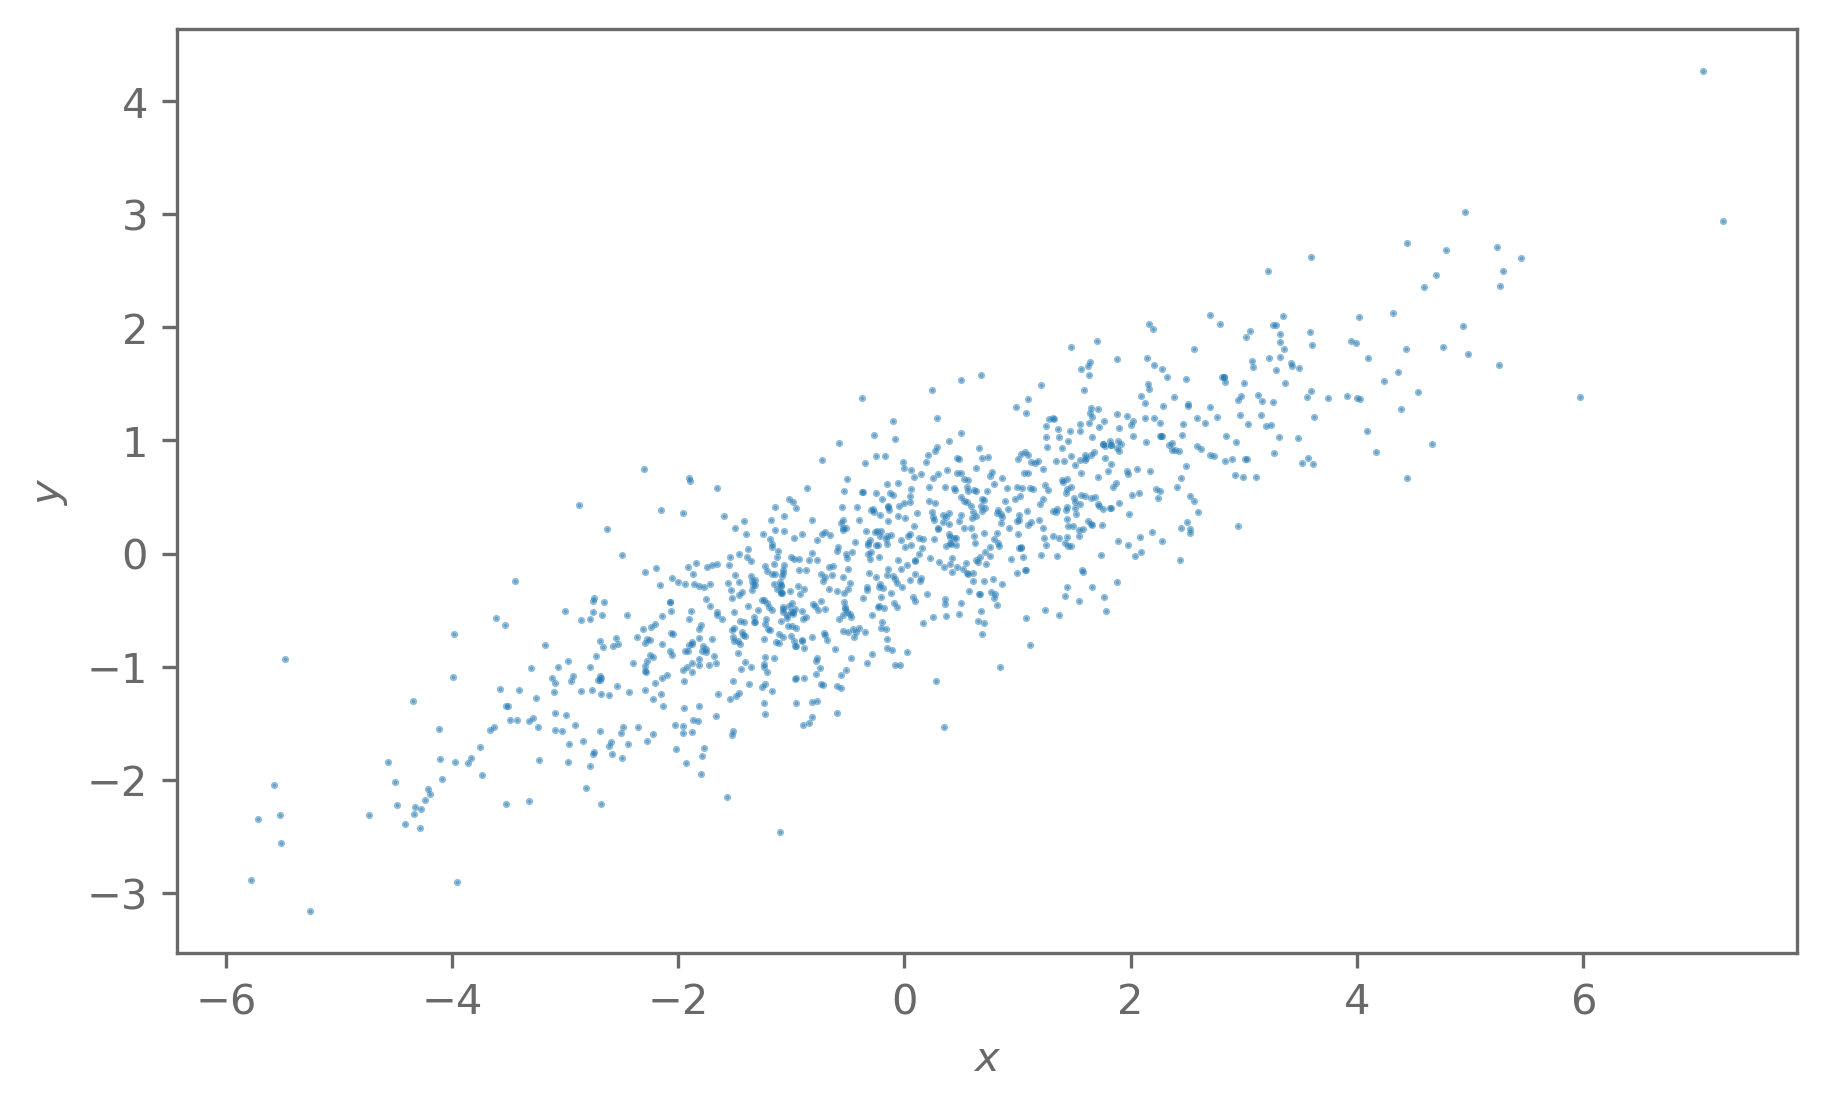

In [10]:
# Define variances and correlation
sigma_x = 2
sigma_y = 1
rho = 0.85

# Define mean and covariance
mean = np.array([0.0, 0.0])
cov = np.array([[sigma_x**2, sigma_x*sigma_y*rho],
                [sigma_x*sigma_y*rho, sigma_y**2]])

# Create distribution object
samples = scipy.stats.multivariate_normal(mean=mean, cov=cov).rvs(1000)

plt.scatter(*samples.T, s=0.5, alpha=0.5, label="Data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.gca().set_aspect('equal');

In [11]:
def PCA(data):
    # Remove the mean
    data_mean = data.mean(axis=1)[:, None]
    X = data - data_mean
    # Get covariance and its eigenvectors
    cov_X = np.cov(X)
    l, E = np.linalg.eigh(cov_X)

    # Sort by the eigenvalues
    sort_idx = np.argsort(l)[::-1]
    l = l[sort_idx]
    E = E[:,sort_idx]

    def project_onto_pc(d):
        if d.ndim == 1:
            d = d[:, np.newaxis]
        return E.T @ (d - data_mean)
    
    def reconstruct_from_pc(c):
        if c.ndim == 1:
            c = c[:, np.newaxis]
        return E[:, :c.shape[0]] @ c + data_mean

    return l, E, project_onto_pc, reconstruct_from_pc

l, E, project_onto_pc, reconstruct_from_pc = PCA(samples.T)

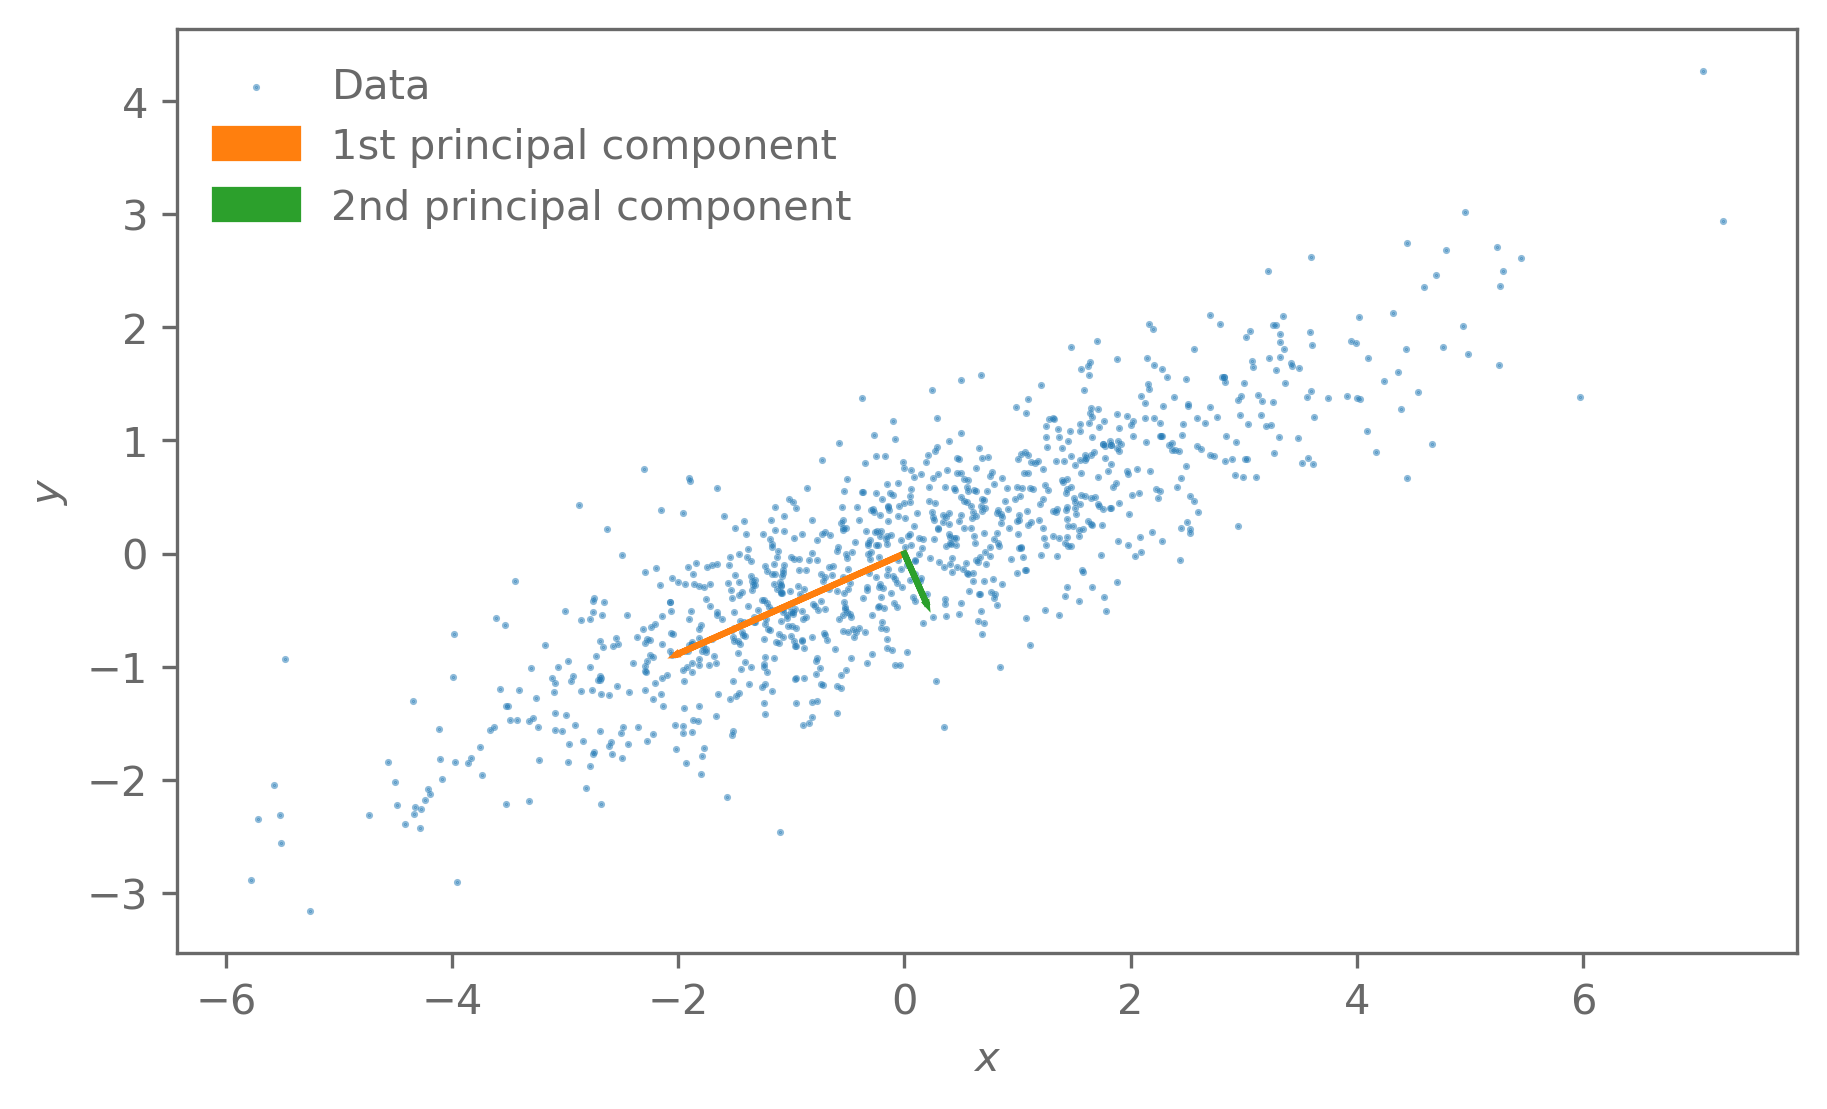

In [12]:
plt.scatter(*samples.T, s=0.5, alpha=0.5, label="Data")
plt.arrow(0, 0, *(np.sqrt(l[0])*E[:, 0]), lw=1.5, color="C1", label="1st principal component")
plt.arrow(0, 0, *(np.sqrt(l[1])*E[:, 1]), lw=1.5, color="C2", label="2nd principal component")
plt.gca().set_aspect('equal')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(frameon=False);

For Gaussian data, the principal components capture all the information about the distribution.

For non-Gaussian data that is not the case but PCA might still be useful for finding informative subspaces.

#### Example: matter power spectra

In `data/Pk_lib/power_spectrum_suppression.txt` are a list of ratios of matter power spectra from hydrodynamical simulations and the same simulations but assuming all matter is dark matter.

In [14]:
d = np.loadtxt("data/Pk_lib/power_spectrum_suppression.txt")
k = d[:, 0]
power_spectra = d[:, 1:]

with open("data/Pk_lib/power_spectrum_suppression.txt", "r") as f:
    names = [s.strip() for s in f.readline().lstrip("#").split(",")][1:]

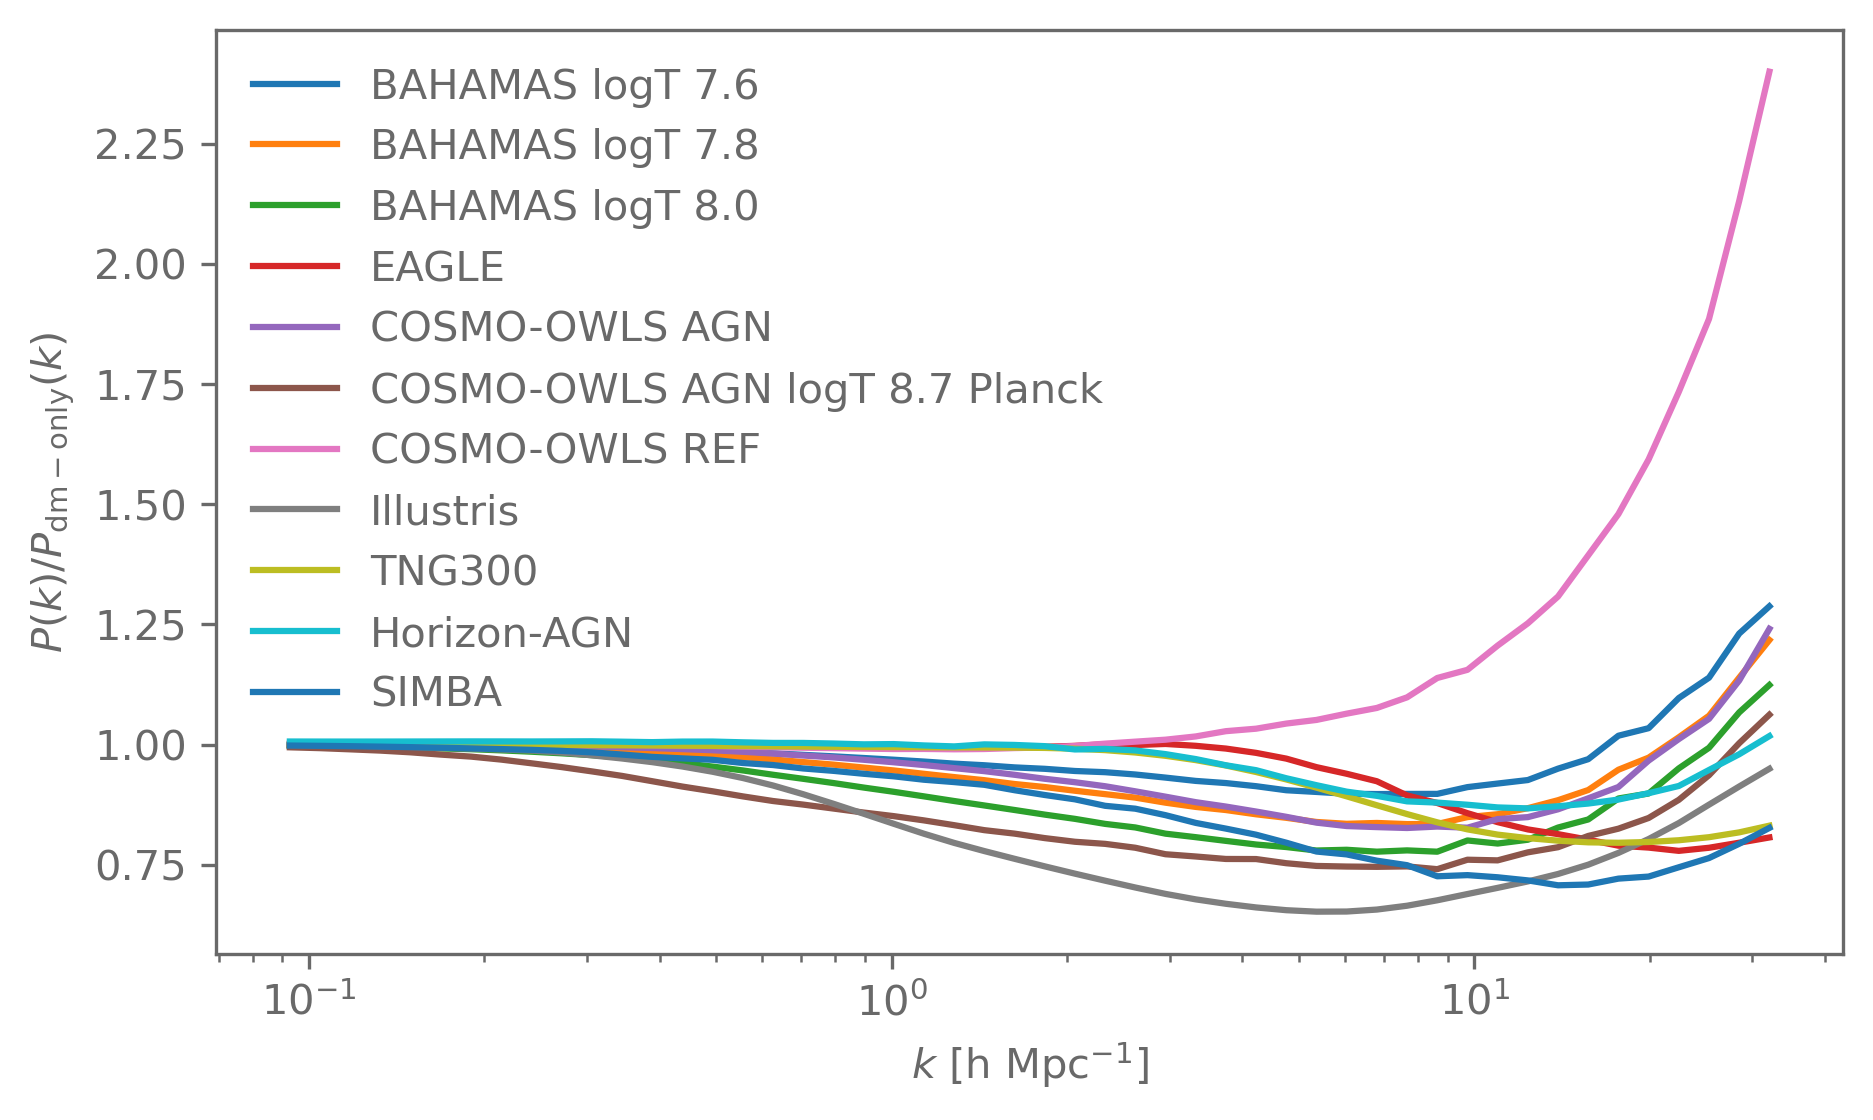

In [15]:
for name, r in zip(names, power_spectra.T):
    plt.plot(k, r, label=name)

plt.xscale("log")
plt.legend(frameon=False)
plt.xlabel("$k$ [h Mpc$^{-1}$]")
plt.ylabel(r"$P(k) / P_\mathrm{dm-only}(k)$");

In [16]:
l, E, project_onto_pc, reconstruct_from_pc = PCA(power_spectra)

Check the eigenvalues:

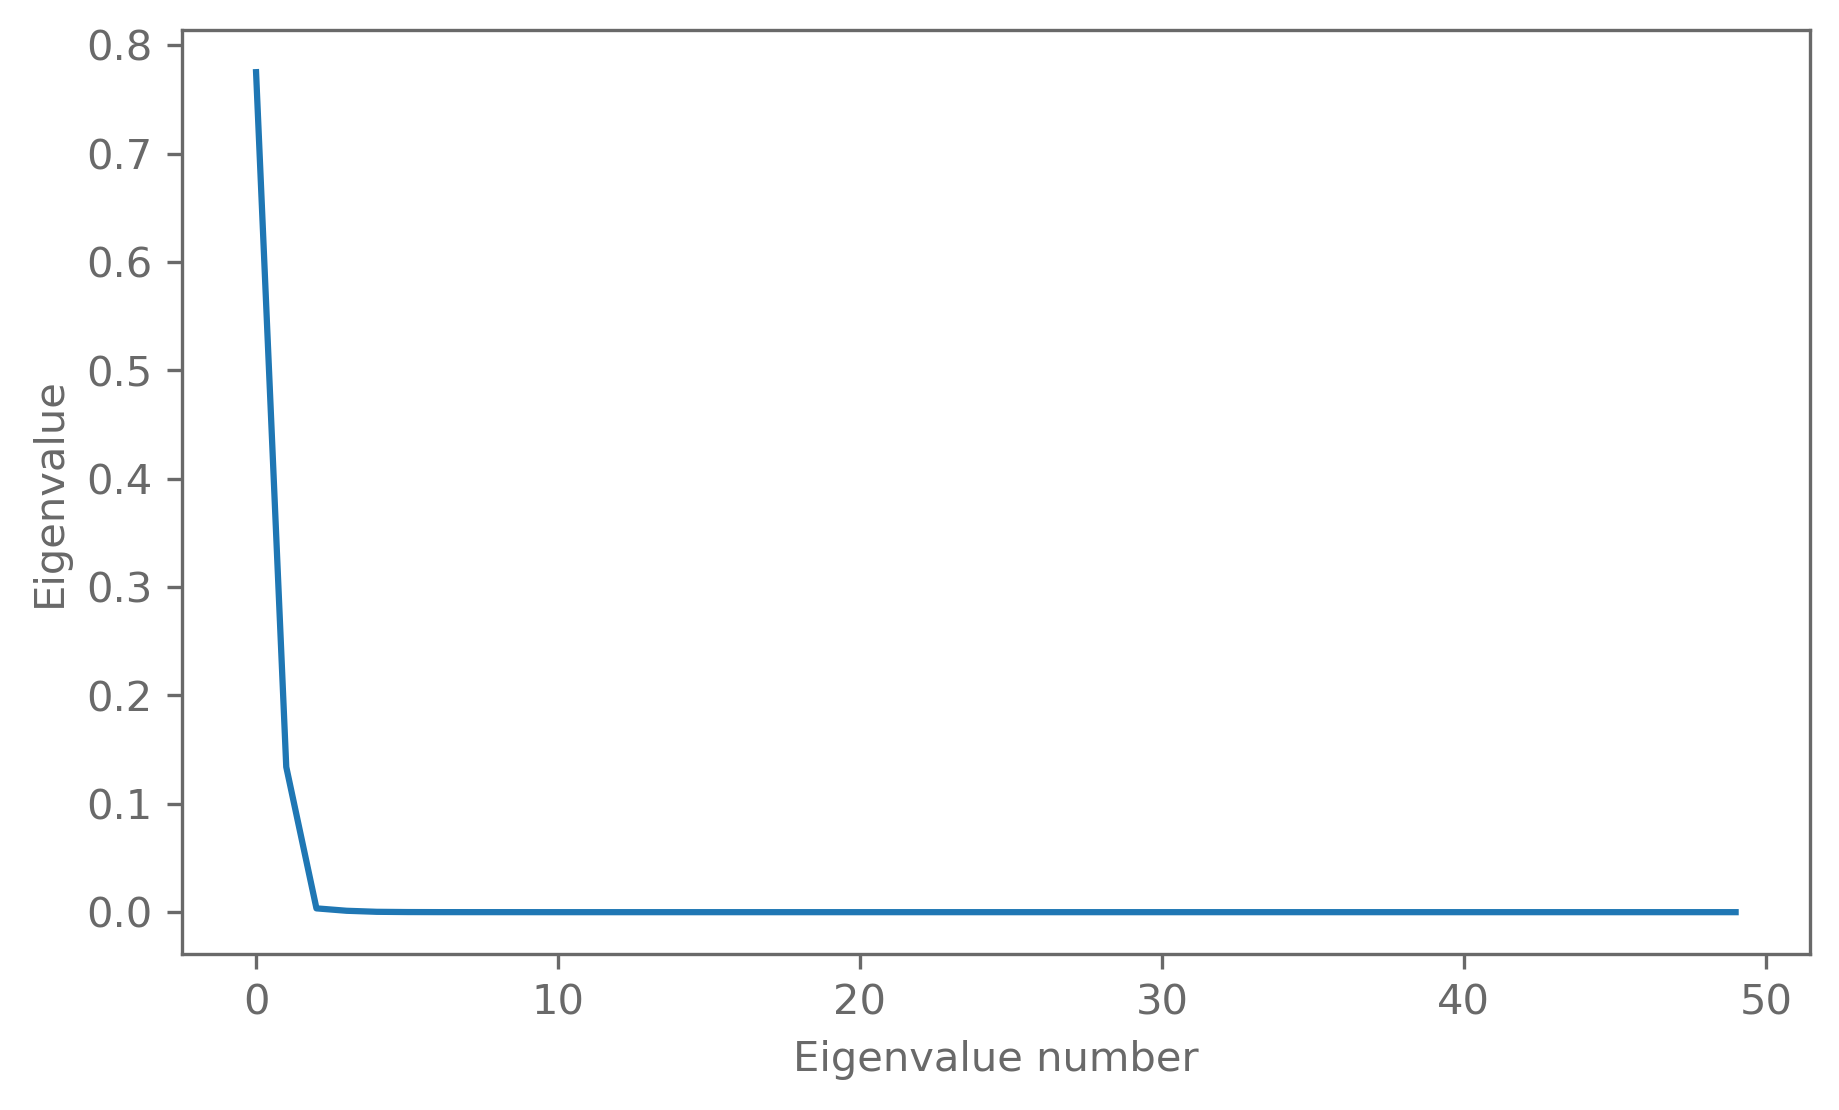

In [17]:
# Check the eigenvalues
plt.plot(l)
plt.ylabel("Eigenvalue")
plt.xlabel("Eigenvalue number");

What are the principal components that the data are projected onto (show in data space here)?

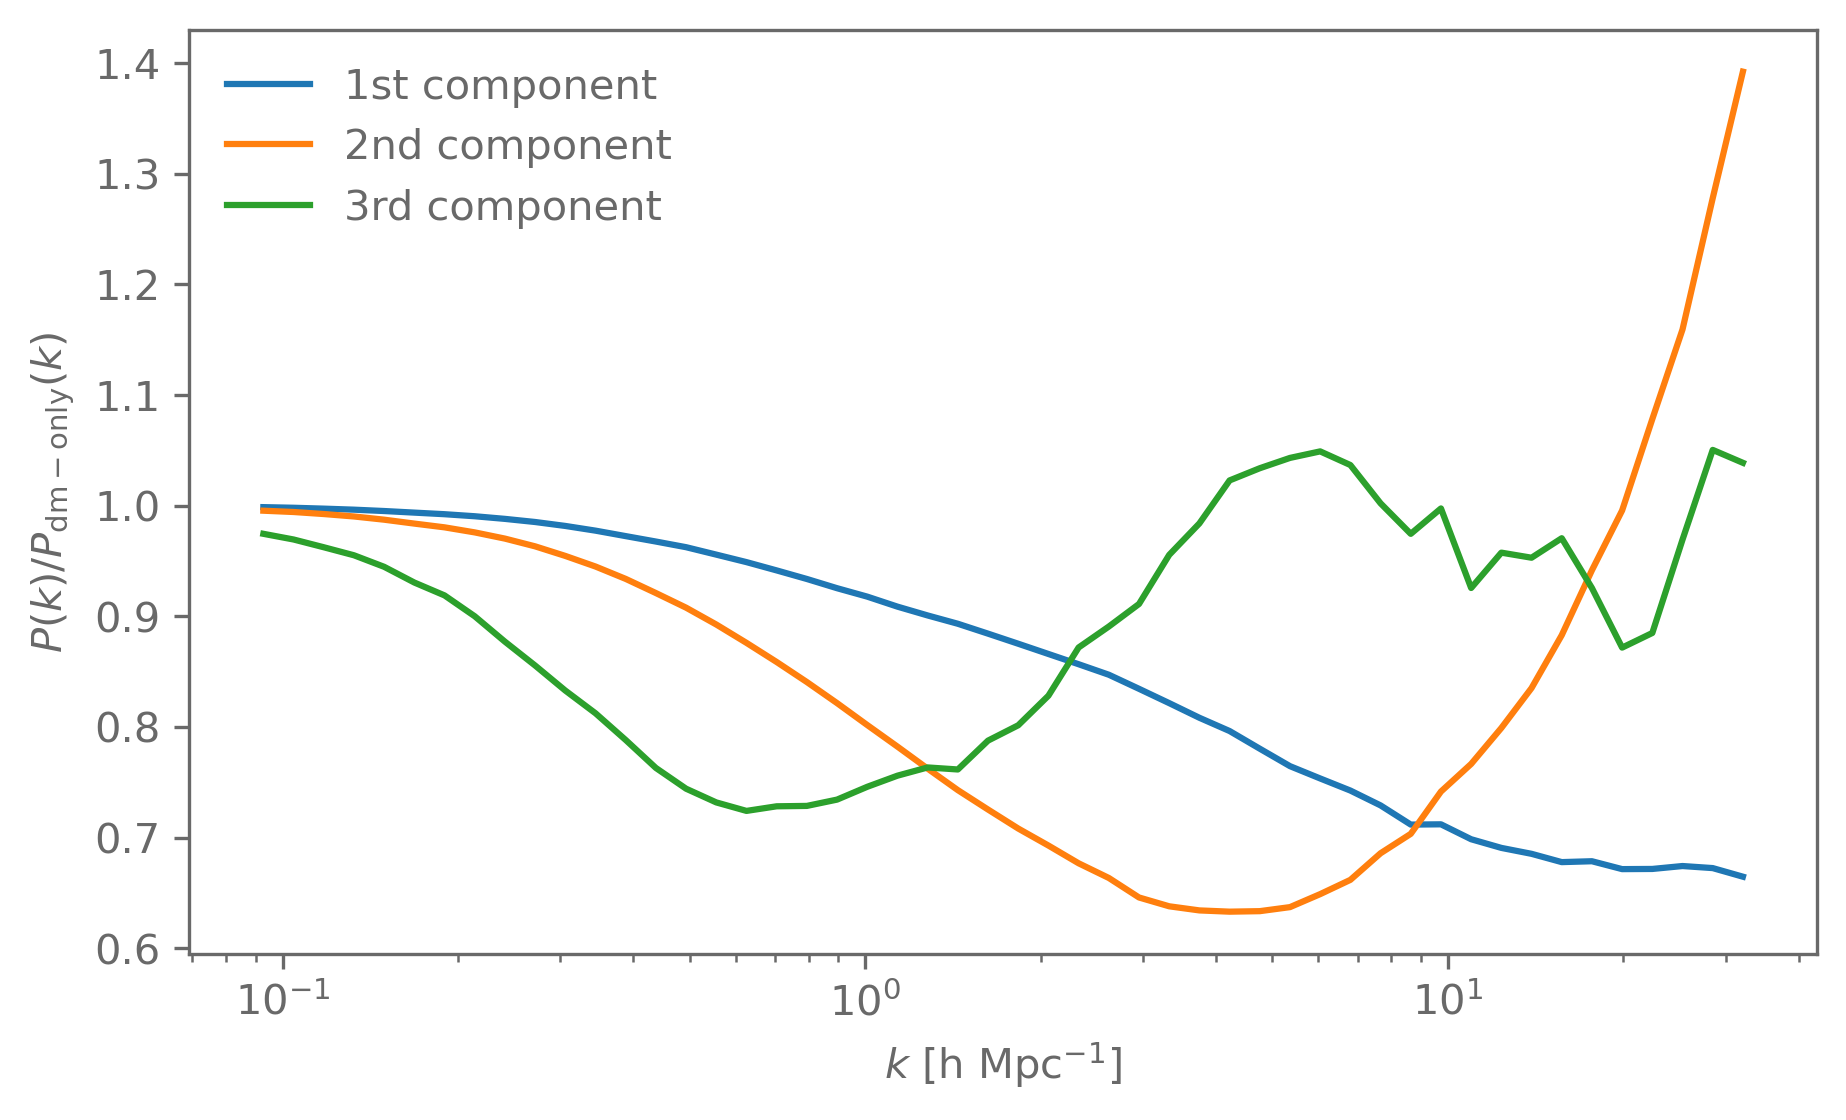

In [18]:
# plt.semilogx(k, E[:, 0])
# plt.semilogx(k, E[:, 1])
# plt.semilogx(k, E[:, 2])

plt.semilogx(k, reconstruct_from_pc(np.array([1,])), label="1st component");
plt.semilogx(k, reconstruct_from_pc(np.array([0,1])), label="2nd component");
plt.semilogx(k, reconstruct_from_pc(np.array([0,0,1])), label="3rd component");

plt.legend(frameon=False)
plt.xlabel("$k$ [h Mpc$^{-1}$]")
plt.ylabel(r"$P(k) / P_\mathrm{dm-only}(k)$");
# plt.semilogx(k, E[:, 1])
# plt.semilogx(k, E[:, 2])

Project back into data space with only a few components.

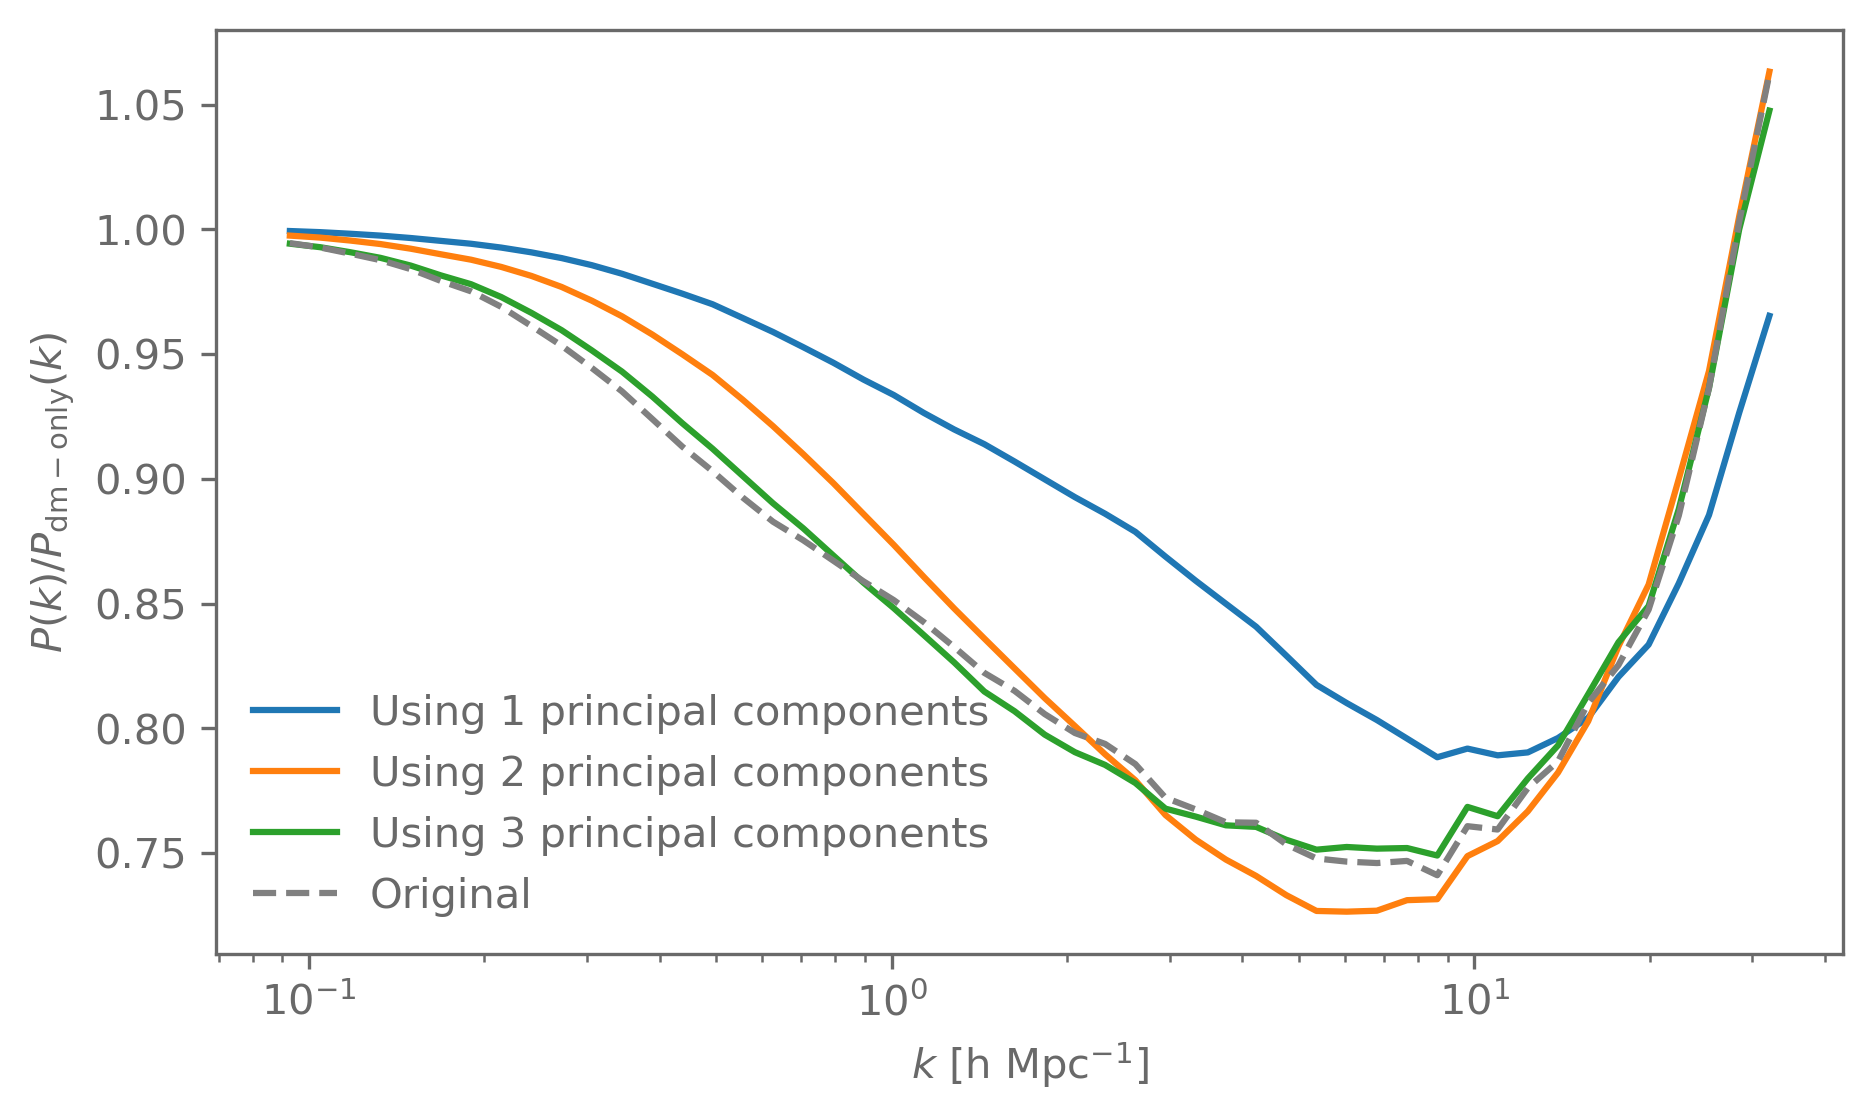

In [19]:
data_point = power_spectra[:, 5]
coefficients = project_onto_pc(data_point)

for n_components in range(1, 4):
    reconstructed = reconstruct_from_pc(coefficients[:n_components])
    plt.semilogx(k, reconstructed, label=f"Using {n_components} principal components")

plt.semilogx(k, data_point, ls="--", color="grey", label=f"Original")
plt.legend(frameon=False)
plt.xlabel("$k$ [h Mpc$^{-1}$]")
plt.ylabel(r"$P(k) / P_\mathrm{dm-only}(k)$");

## Bootstrap

We are often in the situation where we have data but do not know the distribution of the statistics of the data.

Here the [bootstrap](http://dx.doi.org/10.1214/aos/1176344552) comes in handy, as it allows us to approximate the sampling distribution of our statistic from the sample:

Assume we have $n$ iid data $X_i$, and a statistic $\phi$.

We can calculate the value of the statistic on the sample $f = \phi(X_1,\dots,X_n)$.

What we want to know is the sampling distribution of $\phi$, i.e., what values $f$ would take if we were to sample new $X_i$ from the true distribution of $X$.

1. Sample with replacement $n$ times from the $n$ samples $X_i$. Let us call these $Y_i$
2. Compute the statistic using the resampled data: $f^* = \phi(Y_1,\dots,Y_n)$
3. Repeat steps 1) and 2) $N$ times ($N$ being large), recording the values of $f^*_j$, $j=1,\dots,N$

The distribution of $f^*_j$ approximates the true sampling distribution of $f$.

This is a pretty amazing result. Because we seem to get something (the sampling distribution) from nothing (just the one realisation of the samples), this is called the bootstrap.

In its basic form it assumes independent data, extensions to dependent data do exist and usually revolve around resampling blocks of the data that are approximately independent.

In [23]:
def bootstrap(data, statistic, n_trial):
    n_data = data.shape[1]
    s = []
    for i in range(n_trial):
        idx = np.random.choice(n_data, size=n_data, replace=True)
        data_resampled = data[:, idx]
        s.append(statistic(data_resampled))
    
    return np.array(s)

In [24]:
def PCA_coefficients(data, data_point):
    l, E, project_onto_pc, reconstruct_from_pc = PCA(data)
    coefficients = project_onto_pc(data_point)
    return coefficients

coefficient_samples = bootstrap(
    power_spectra,
    statistic=lambda data: PCA_coefficients(
        data, data_point=data_point),
    n_trial=1000
)

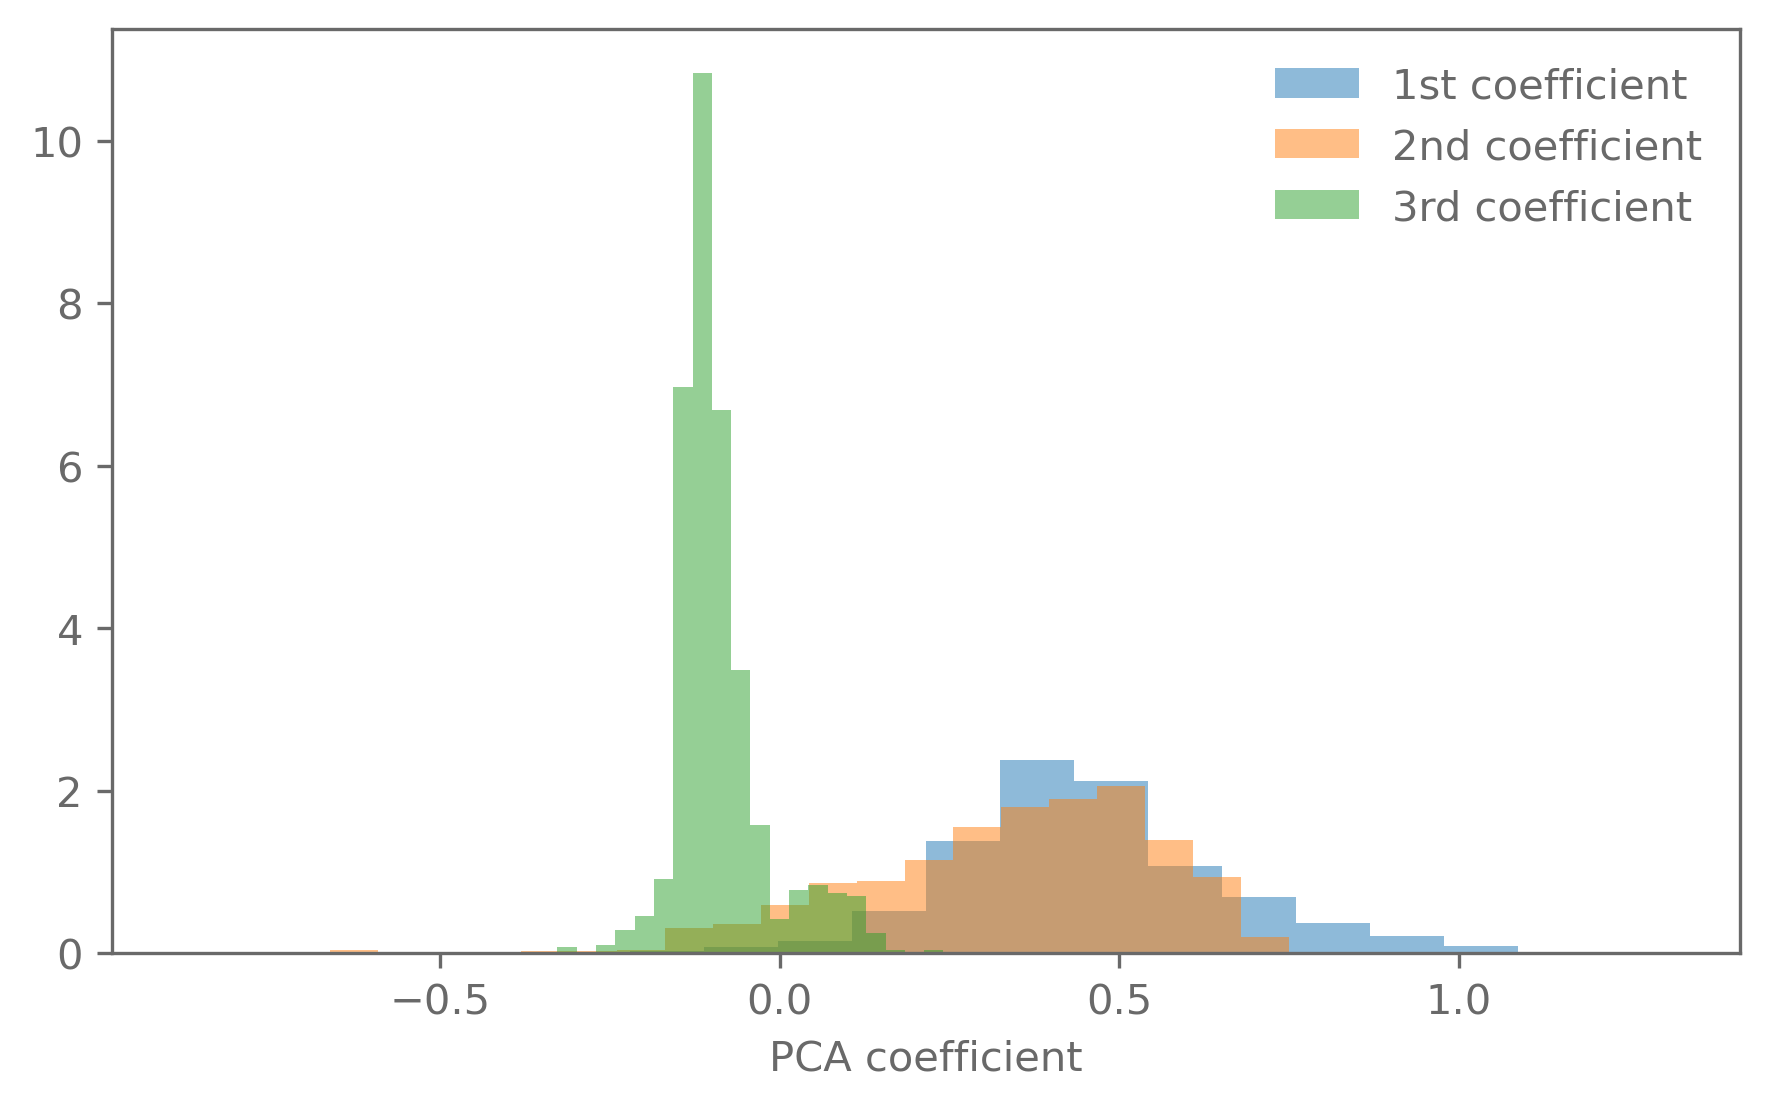

In [25]:
plt.hist(coefficient_samples[:,0], bins=20, density=True, alpha=0.5, label="1st coefficient")
plt.hist(coefficient_samples[:,1], bins=20, density=True, alpha=0.5, label="2nd coefficient")
plt.hist(coefficient_samples[:,2], bins=20, density=True, alpha=0.5, label="3rd coefficient")
plt.legend(frameon=False)
plt.xlabel("PCA coefficient");

Estimate the uncertainty of a reconstructed power spectrum.

In [26]:
def PCA_and_reconstruct(data, data_point, n_component):
    l, E, project_onto_pc, reconstruct_from_pc = PCA(data)
    coefficients = project_onto_pc(data_point)
    return reconstruct_from_pc(coefficients[:n_component])

data_point = power_spectra[:, 5]
l, E, project_onto_pc, reconstruct_from_pc = PCA(power_spectra)
coefficients = project_onto_pc(data_point)
reconstructed = reconstruct_from_pc(coefficients[:3])

reconstructed_samples = bootstrap(
    power_spectra,
    statistic=lambda data: PCA_and_reconstruct(
        data, data_point=data_point, n_component=3),
    n_trial=200
)

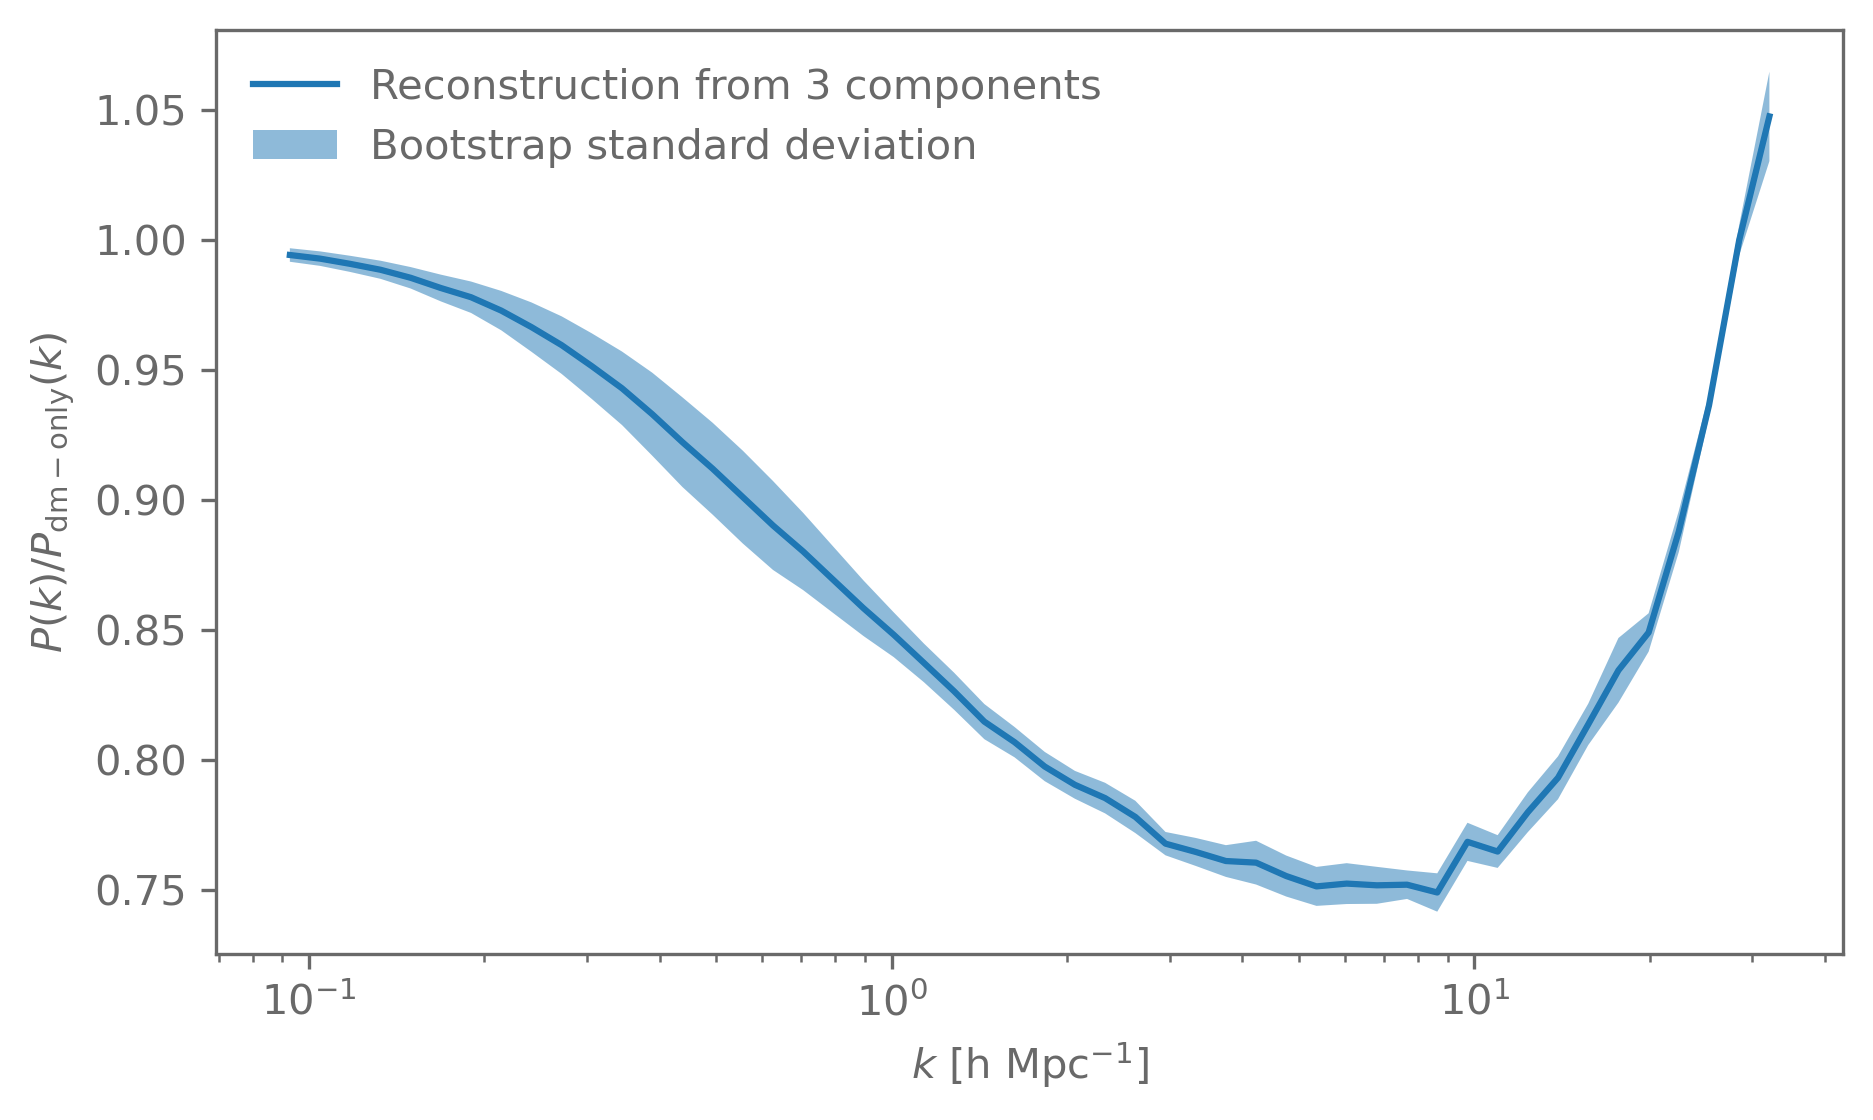

In [34]:
reconstructed = reconstructed.squeeze()
plt.semilogx(k, reconstructed, label="Reconstruction from 3 components")
std = reconstructed_samples.std(axis=0).squeeze()
plt.fill_between(k, reconstructed-std, reconstructed+std,
                 alpha=0.5, label="Bootstrap standard deviation")
plt.legend(frameon=False)
plt.xlabel("$k$ [h Mpc$^{-1}$]")
plt.ylabel(r"$P(k) / P_\mathrm{dm-only}(k)$");

## Exercise

Check that the boostrap works for a case where we do know the sampling distribution. For example the estimators discussed at the beginning of this lecture.